In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Splitting**

In [ ]:
pip install split-folders[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install split-folders
import splitfolders # or import splitfolders
input_folder = "/content/drive/MyDrive/Thesis Raw Dataset/Fruit"
output = "/content/drive/MyDrive/Grocery/Fruit" #where you want the split datasets saved. one will be created if it does not exist or none is set

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.8, .1, .1))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 1466 files [03:42,  6.60 files/s]


In [ ]:
import splitfolders # or import splitfolders
input_folder = "/content/drive/MyDrive/Thesis Raw Dataset/Packages"
output = "/content/drive/MyDrive/Grocery/Packages" #where you want the split datasets saved. one will be created if it does not exist or none is set

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.8, .1, .1))

Copying files: 1120 files [02:03,  9.06 files/s]


In [ ]:
import splitfolders # or import splitfolders
input_folder = "/content/drive/MyDrive/Thesis Raw Dataset/Vegetables"
output = "/content/drive/MyDrive/Grocery/Vegetables" #where you want the split datasets saved. one will be created if it does not exist or none is set

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.8, .1, .1))

Copying files: 589 files [01:43,  5.67 files/s]


# **Importing**

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt



import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import *
from tensorflow.keras.initializers import *
import random
import matplotlib.image as mpimg
%matplotlib inline


from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import ResNet50


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# **MobileNET**

In [ ]:
im_shape = (224,224)
seed = random.randint(1, 1000)

BATCH_SIZE = 32
num_classes = 3

learning_rate = 0.0001

datagenmobile = ImageDataGenerator(preprocessing_function=preprocess_input) #rescale=1./255,

traingenmobile = datagenmobile.flow_from_directory(train_path, target_size=(im_shape[0],im_shape[1]), shuffle=True, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")#, color_mode='grayscale')

val_generatormobile = ImageDataGenerator(preprocessing_function=preprocess_input)
valgenmobile = val_generatormobile.flow_from_directory(validation, target_size=(im_shape[0],im_shape[1]), shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE)#, color_mode='grayscale')
nb_train_samples = traingenmobile.samples
nb_validation_samples = valgenmobile.samples




test_generatormobile = ImageDataGenerator(preprocessing_function=preprocess_input)#rescale=1./255

testgenmobile = test_generatormobile.flow_from_directory(test_path, target_size=(im_shape[0],im_shape[1]), shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")#, color_mode='grayscale')
nb_test_samples = testgenmobile.samples





Found 2509 images belonging to 3 classes.
Found 297 images belonging to 3 classes.
Found 356 images belonging to 3 classes.


In [ ]:
# Loading MobileNet without top layer
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(im_shape[0], im_shape[1], 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(rate = .4)(x)
x = BatchNormalization()(x)
x = Dense(1280, activation='relu',  kernel_initializer=glorot_uniform(seed))(x)
x = Dropout(rate = .4)(x)
x = BatchNormalization()(x)
predictions = Dense(num_classes, activation='softmax', kernel_initializer='random_uniform')(x)

model_mobile = Model(inputs=base_model.input, outputs=predictions)

# Freezing MobileNet layers
for layer in base_model.layers:
    layer.trainable=False

optimizer = Adam(lr=learning_rate)

model_mobile.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(traingenmobile.classes),
                                        y = traingenmobile.classes
                                    )
class_weights = dict(zip(np.unique(traingenmobile.classes), class_weights))
class_weights

{0: 0.7184994272623139, 1: 0.9471498678746697, 2: 1.8102453102453102}

In [ ]:
epochs = 10

#Save the best model acoording to validation loss
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model_mobile.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=50,verbose=1)
]

fit_history_mobile = model_mobile.fit(
        traingenmobile,
        steps_per_epoch=nb_train_samples // BATCH_SIZE,
        epochs=epochs,
        callbacks = callbacks_list,
        validation_data=valgenmobile,
        verbose = 1,
        validation_steps=nb_validation_samples // BATCH_SIZE,
        class_weight = class_weights)

Epoch 1/10
78/78 [==============================] - ETA: 0s - loss: 0.0212 - accuracy: 0.9927
Epoch 1: val_loss improved from inf to 0.01298, saving model to model_mobile.h5
78/78 [==============================] - 137s 2s/step - loss: 0.0212 - accuracy: 0.9927 - val_loss: 0.0130 - val_accuracy: 0.9931
Epoch 2/10
78/78 [==============================] - ETA: 0s - loss: 0.0242 - accuracy: 0.9903
Epoch 2: val_loss improved from 0.01298 to 0.00611, saving model to model_mobile.h5
78/78 [==============================] - 137s 2s/step - loss: 0.0242 - accuracy: 0.9903 - val_loss: 0.0061 - val_accuracy: 0.9965
Epoch 3/10
78/78 [==============================] - ETA: 0s - loss: 0.0176 - accuracy: 0.9927
Epoch 3: val_loss improved from 0.00611 to 0.00203, saving model to model_mobile.h5
78/78 [==============================] - 134s 2s/step - loss: 0.0176 - accuracy: 0.9927 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 4/10
78/78 [==============================] - ETA: 0s - loss: 0.0208 - acc

In [ ]:
model_mobile.save('/content/drive/MyDrive/Grocery/Models/model_mobile')


In [ ]:
steps_per_epoch_test_mobile = math.ceil(len(testgenmobile)/ 10)

from keras.models import load_model
trained_model_mobile = load_model('/content/drive/MyDrive/Grocery/Models/model_mobile')
score_mobile= trained_model_mobile.evaluate_generator(testgenmobile, steps=steps_per_epoch_test_res50)
print('Accuracy of MobileNET: {}% \n Error: {}'.format((score_mobile[1]*100), (1 - score_mobile[1])*100))

<ipython-input-17-eaf650e4e735>:5: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score_mobile= trained_model_mobile.evaluate_generator(testgenmobile, steps=steps_per_epoch_test_res50)


Accuracy of MobileNET: 98.4375% 
 Error: 1.5625


In [ ]:
from sklearn.metrics import classification_report

Y_pred = trained_model_mobile.predict_generator(testgenmobile, nb_test_samples // BATCH_SIZE+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report')
target_names = ['Fruit', 'Packages', 'Vegetables']
print(classification_report(testgenmobile.classes, y_pred, target_names=target_names))

<ipython-input-18-be309df045e8>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = trained_model_mobile.predict_generator(testgenmobile, nb_test_samples // BATCH_SIZE+1)


Classification Report
              precision    recall  f1-score   support

       Fruit       0.99      0.98      0.98       163
    Packages       0.99      1.00      1.00       121
  Vegetables       0.96      0.96      0.96        72

    accuracy                           0.98       356
   macro avg       0.98      0.98      0.98       356
weighted avg       0.98      0.98      0.98       356



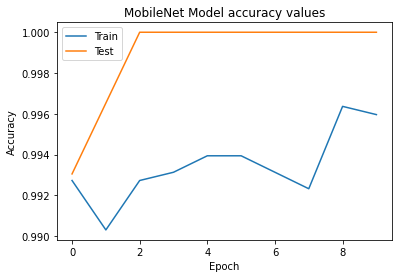

In [ ]:
# Plot training & validation loss values
plt.plot(fit_history_mobile.history['accuracy'])
plt.plot(fit_history_mobile.history['val_accuracy'])
plt.title('MobileNet Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# **VGG16**

In [ ]:
IMAGE_SIZE = [224, 224]
num_classes_vgg16 = 3
image_resize = 224
batch_size_training = 10
batch_size_validation = 10

test_path='/content/drive/MyDrive/Grocery/test'


train_path='/content/drive/MyDrive/Grocery/train'

validation = '/content/drive/MyDrive/Grocery/validation'


datagenvgg = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
)

traingenvgg = datagenvgg.flow_from_directory(
    train_path,
    target_size=(image_resize, image_resize),
    batch_size=batch_size_training,
    class_mode='categorical')

testgenvgg= datagenvgg.flow_from_directory(
    test_path,
    target_size=(image_resize, image_resize),
    shuffle=False)

valgenvgg= datagenvgg.flow_from_directory(
    validation,
    target_size=(image_resize, image_resize),
    batch_size=batch_size_validation,
    class_mode='categorical')



Found 2509 images belonging to 3 classes.
Found 356 images belonging to 3 classes.
Found 297 images belonging to 3 classes.


In [ ]:
modelvgg = Sequential()
modelvgg.add(VGG16(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    ))

modelvgg.add(Dense(num_classes_vgg16, activation='softmax'))
modelvgg.layers

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
modelvgg.layers[0].layers

In [ ]:
modelvgg.layers[0].trainable = False

In [ ]:
modelvgg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense (Dense)               (None, 3)                 1539      
                                                                 
Total params: 14,716,227
Trainable params: 1,539
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
modelvgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

steps_per_epoch_training_vgg= len(traingenvgg)/ batch_size_training
steps_per_epoch_validation_vgg = len(valgenvgg)/ batch_size_validation
num_epochs_vgg = 10

fit_history_vgg= modelvgg.fit(
    traingenvgg,
    steps_per_epoch=steps_per_epoch_training_vgg,
    epochs=num_epochs_vgg,
    validation_data=valgenvgg,
    validation_steps=steps_per_epoch_validation_vgg,
    verbose=1,
)

Epoch 1/10
26/25 [===============================] - ETA: -5s - loss: 3.2331 - accuracy: 0.6615

25/25 [==============================] - 188s 7s/step - loss: 3.2331 - accuracy: 0.6615 - val_loss: 0.7554 - val_accuracy: 0.8000
Epoch 2/10
25/25 [==============================] - 161s 6s/step - loss: 1.4281 - accuracy: 0.7838 - val_loss: 2.1766 - val_accuracy: 0.7333
Epoch 3/10
25/25 [==============================] - 156s 6s/step - loss: 0.5527 - accuracy: 0.8846 - val_loss: 1.9024 - val_accuracy: 0.8667
Epoch 4/10
25/25 [==============================] - 157s 6s/step - loss: 0.4381 - accuracy: 0.9038 - val_loss: 1.5022 - val_accuracy: 0.8667
Epoch 5/10
25/25 [==============================] - 154s 6s/step - loss: 0.5010 - accuracy: 0.9038 - val_loss: 0.1412 - val_accuracy: 0.9333
Epoch 6/10
25/25 [==============================] - 157s 6s/step - loss: 0.4530 - accuracy: 0.9077 - val_loss: 0.5435 - val_accuracy: 0.8667
Epoch 7/10
25/25 [==============================] - 155s 6s/step - loss: 0.2753 - accuracy: 0.9385 - val_loss: 0.4110 - val_accuracy: 0.9000
Epoch 8/10
25/25 [======

In [ ]:
modelvgg.save('/content/drive/MyDrive/Grocery/Models/classifier_vgg16_model')

In [ ]:
steps_per_epoch_test_vgg = len(testgenvgg)/ batch_size_validation

from keras.models import load_model
trained_model_vgg = load_model('/content/drive/MyDrive/Grocery/Models/classifier_vgg16_model')

score_vgg = trained_model_vgg.evaluate_generator(testgenvgg, steps=steps_per_epoch_test_vgg)

print('Accuracy of VGG16: {}% \n Error: {}'.format((score_vgg[1]*100), (1 - score_vgg[1])*100))

<ipython-input-9-2947845e069b>:6: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score_vgg = trained_model_vgg.evaluate_generator(testgenvgg, steps=steps_per_epoch_test_vgg)


Accuracy of VGG16: 90.625% 
 Error: 9.375


In [ ]:
!pip install pyyaml h5py
import os

import tensorflow as tf
from tensorflow import keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


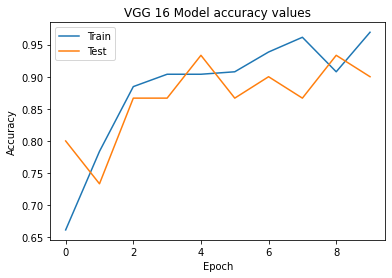

In [ ]:
# Plot training & validation loss values
plt.plot(fit_history_vgg.history['accuracy'])
plt.plot(fit_history_vgg.history['val_accuracy'])
plt.title('VGG 16 Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# **RESNET50**

In [ ]:
import tensorflow as tf
datagenres50 = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input ,
)

traingenres50 = datagenres50.flow_from_directory(
    train_path ,
    target_size=(image_resize, image_resize),
    batch_size=batch_size_training,
    class_mode='categorical')

valgenres50 = datagenres50.flow_from_directory(
    validation,
    target_size=(image_resize, image_resize),
    batch_size=batch_size_validation,
    class_mode='categorical')

testgenres50 = datagenres50.flow_from_directory(
    test_path,
    target_size=(image_resize, image_resize),
    shuffle=False)


modelres50 = Sequential()

modelres50.add(ResNet50(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    ))

modelres50.add(Dense(num_classes_vgg16, activation='softmax'))

modelres50.layers
modelres50.layers[0].layers
modelres50.layers[0].trainable = False
modelres50.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Found 2509 images belonging to 3 classes.
Found 297 images belonging to 3 classes.
Found 356 images belonging to 3 classes.
94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
print(len(traingenres50))
print(len(valgenres50))
import math
steps_per_epoch_training_res50 = math.ceil(len(traingenres50)/ batch_size_training)
#int(round(len(train_generator)/ batch_size_training))
steps_per_epoch_validation_res50 = math.ceil(len(valgenres50)/ batch_size_validation)
num_epochs_res50 = 10

print(steps_per_epoch_validation_res50)
fit_history_res50 = modelres50.fit(
    traingenres50,
    steps_per_epoch=steps_per_epoch_training_res50,
    epochs=10,
    validation_data=valgenres50,
    validation_steps=steps_per_epoch_validation_res50,
    verbose=1,
)

In [ ]:
modelres50.save('/content/drive/MyDrive/Grocery/Models/classifier_resnet_model')


In [ ]:
steps_per_epoch_test_res50 = math.ceil(len(testgenres50)/ 10)

from keras.models import load_model
trained_model_res50 = load_model('/content/drive/MyDrive/Grocery/Models/classifier_resnet_model')
score_res50 = trained_model_res50.evaluate_generator(testgenres50, steps=steps_per_epoch_test_res50)
print('Accuracy of ResNET50: {}% \n Error: {}'.format((score_res50[1]*100), (1 - score_res50[1])*100))

<ipython-input-13-fa3b3838da0a>:5: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score_res50 = trained_model_res50.evaluate_generator(testgenres50, steps=steps_per_epoch_test_res50)


Accuracy of ResNET50: 98.4375% 
 Error: 1.5625


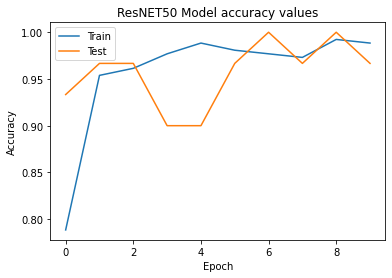

In [ ]:
# Plot training & validation loss values
plt.plot(fit_history_res50.history['accuracy'])
plt.plot(fit_history_res50.history['val_accuracy'])
plt.title('ResNET50 Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# **Ensemble Learning**

In [ ]:
IMAGE_SIZE = [224, 224]
num_classes_vgg16 = 3
image_resize = 224
batch_size_training = 10
batch_size_validation = 10

test_path='/content/drive/MyDrive/Grocery/test'


train_path='/content/drive/MyDrive/Grocery/train'

validation = '/content/drive/MyDrive/Grocery/validation'

In [ ]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average

vgg_model = load_model('/content/drive/MyDrive/Grocery/Models/classifier_vgg16_model')
vgg_model = Model(inputs = vgg_model.inputs, outputs = vgg_model.outputs, name = 'modelvgg')
resnet_model = load_model('/content/drive/MyDrive/Grocery/Models/classifier_resnet_model')
resnet_model = Model(inputs = resnet_model.inputs, outputs = resnet_model.outputs, name = 'modelres50')
mobilenet_model = load_model('/content/drive/MyDrive/Grocery/Models/model_mobile')
mobilenet_model = Model(inputs = mobilenet_model.inputs, outputs = mobilenet_model.outputs, name = 'modelmobile')

combine_models = [vgg_model, resnet_model, mobilenet_model]
model_input = Input(shape =(224, 224, 3))
model_outputs = [model(model_input) for model in combine_models]
ensemble_output = Average ()(model_outputs)
ensemble_model = Model (inputs = model_input, outputs = ensemble_output, name = 'ensemble' )

In [ ]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average

vgg_model = load_model('/content/drive/MyDrive/Grocery/Models/classifier_vgg16_model')
vgg_model = Model(inputs = vgg_model.inputs, outputs = vgg_model.outputs, name = 'modelvgg')
resnet_model = load_model('/content/drive/MyDrive/Grocery/Models/classifier_resnet_model')
resnet_model = Model(inputs = resnet_model.inputs, outputs = resnet_model.outputs, name = 'modelres50')

combine_models2 = [vgg_model, resnet_model]
model_input = Input(shape =(224, 224, 3))
model_outputs2 = [model(model_input) for model in combine_models2]
ensemble_output2 = Average ()(model_outputs2)
ensemble_model2 = Model (inputs = model_input, outputs = ensemble_output2, name = 'ensemble2' )

In [ ]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average

vgg_model = load_model('/content/drive/MyDrive/Grocery/Models/classifier_vgg16_model')
vgg_model = Model(inputs = vgg_model.inputs, outputs = vgg_model.outputs, name = 'modelvgg')
resnet_model = load_model('/content/drive/MyDrive/Grocery/Models/classifier_resnet_model')
resnet_model = Model(inputs = resnet_model.inputs, outputs = resnet_model.outputs, name = 'modelres50')
mobilenet_model = load_model('/content/drive/MyDrive/Grocery/Models/model_mobile')
mobilenet_model = Model(inputs = mobilenet_model.inputs, outputs = mobilenet_model.outputs, name = 'modelmobile')

combine_models3 = [vgg_model, mobilenet_model]
model_input = Input(shape =(224, 224, 3))
model_outputs3 = [model(model_input) for model in combine_models3]
ensemble_output3 = Average ()(model_outputs3)
ensemble_model3 = Model (inputs = model_input, outputs = ensemble_output3, name = 'ensemble3' )

In [ ]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average

resnet_model = load_model('/content/drive/MyDrive/Grocery/Models/classifier_resnet_model')
resnet_model = Model(inputs = resnet_model.inputs, outputs = resnet_model.outputs, name = 'modelres50')
mobilenet_model = load_model('/content/drive/MyDrive/Grocery/Models/model_mobile')
mobilenet_model = Model(inputs = mobilenet_model.inputs, outputs = mobilenet_model.outputs, name = 'modelmobile')

combine_models4 = [resnet_model, mobilenet_model]
model_input = Input(shape =(224, 224, 3))
model_outputs4 = [model(model_input) for model in combine_models4]
ensemble_output4 = Average ()(model_outputs4)
ensemble_model4 = Model (inputs = model_input, outputs = ensemble_output4, name = 'ensemble4' )

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_set = train_datagen.flow_from_directory(train_path,
                                              target_size = (224, 224),
                                              batch_size = 50,
                                              class_mode = 'categorical')


test_set = train_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 50,
                                            class_mode = 'categorical')

val_set = train_datagen.flow_from_directory(validation,
                                            target_size = (224, 224),
                                            batch_size = 50,
                                            class_mode = 'categorical')

Found 2509 images belonging to 3 classes.
Found 356 images belonging to 3 classes.
Found 297 images belonging to 3 classes.


In [ ]:
import math
steps_per_epoch_training = math.ceil(len(train_set)/ batch_size_training)
#int(round(len(train_generator)/ batch_size_training))
steps_per_epoch_validation = math.ceil(len(val_set)/ batch_size_validation)

In [ ]:
ensemble_model.compile(optimizer='adam',loss = 'categorical_crossentropy', metrics= ['accuracy'])
ensemble_history = ensemble_model.fit(
    train_set,
    epochs=10,
    validation_data = val_set
)

ensemble_model.save('/content/drive/MyDrive/Grocery/Models/ensemble_model')

In [ ]:
ensemble_model.save('/content/drive/MyDrive/Grocery/Models/ensemble_model')

In [ ]:

from keras.models import load_model
import math
steps_per_epoch_test = math.ceil(len(test_set)/ 10)

trained_model = load_model('/content/drive/MyDrive/Grocery/Models/ensemble_modelNew')
score_combined1= trained_model.evaluate_generator(test_set, steps=steps_per_epoch_test)
print('Accuracy of Combined VGG16, ResNET50, MobileNET: {}% \n Error: {}'.format((score_combined1[1]*100), (1 - score_combined1[1])*100))

<ipython-input-28-a5f98ae19020>:6: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score_combined1= trained_model.evaluate_generator(test_set, steps=steps_per_epoch_test)


Accuracy of Combined VGG16, ResNET50, MobileNET: 83.99999737739563% 
 Error: 16.00000262260437


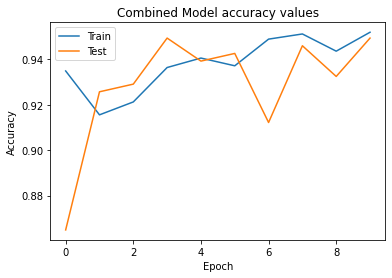

In [ ]:
# Plot training & validation loss values
plt.plot(ensemble_history.history['accuracy'])
plt.plot(ensemble_history.history['val_accuracy'])
plt.title('Combined Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
ensemble_model2.compile(optimizer='adam',loss = 'categorical_crossentropy', metrics= ['accuracy'])
ensemble_history2 = ensemble_model2.fit(
    train_set,
    epochs=10,
    validation_data = val_set
)

ensemble_model2.save('/content/drive/MyDrive/Grocery/Models/ensemble_model_vgg_res')

Epoch 1/10
53/53 [==============================] - 1802s 34s/step - loss: 0.8303 - accuracy: 0.6242 - val_loss: 0.7205 - val_accuracy: 0.6993
Epoch 2/10
53/53 [==============================] - 1765s 33s/step - loss: 0.6496 - accuracy: 0.7314 - val_loss: 0.6447 - val_accuracy: 0.6926
Epoch 3/10
53/53 [==============================] - 1764s 33s/step - loss: 0.5852 - accuracy: 0.7633 - val_loss: 0.5951 - val_accuracy: 0.7297
Epoch 4/10
53/53 [==============================] - 1785s 34s/step - loss: 0.5384 - accuracy: 0.7898 - val_loss: 0.5540 - val_accuracy: 0.8007
Epoch 5/10
53/53 [==============================] - 1784s 34s/step - loss: 0.5048 - accuracy: 0.8087 - val_loss: 0.5431 - val_accuracy: 0.7736
Epoch 6/10
53/53 [==============================] - 1762s 33s/step - loss: 0.4875 - accuracy: 0.8129 - val_loss: 0.5302 - val_accuracy: 0.7804
Epoch 7/10
53/53 [==============================] - 1792s 34s/step - loss: 0.4669 - accuracy: 0.8292 - val_loss: 0.5053 - val_accuracy: 0.7905

In [ ]:
ensemble_model2.save('/content/drive/MyDrive/Grocery/Models/ensemble_model_vgg_res')

In [ ]:

from keras.models import load_model
import math
steps_per_epoch_test = math.ceil(len(test_set)/ 10)

trained_model2 = load_model('/content/drive/MyDrive/Grocery/Models/ensemble_model_vgg_res')
score_combined2= trained_model2.evaluate_generator(test_set, steps=steps_per_epoch_test)
print('Accuracy of Combined VGG16, ResNET50: {}% \n Error: {}'.format((score_combined2[1]*100), (1 - score_combined2[1])*100))

<ipython-input-29-9c784532eb19>:6: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score_combined2= trained_model2.evaluate_generator(test_set, steps=steps_per_epoch_test)


Accuracy of Combined VGG16, ResNET50: 80.0000011920929% 
 Error: 19.999998807907104


In [ ]:
ensemble_model3.compile(optimizer='adam',loss = 'categorical_crossentropy', metrics= ['accuracy'])
ensemble_history3 = ensemble_model3.fit(
    train_set,
    epochs=10,
    validation_data = val_set
)
ensemble_model3.save('/content/drive/MyDrive/Grocery/Models/ensemble_model_vgg_mob')

Epoch 1/10
51/51 [==============================] - 1594s 31s/step - loss: 0.2701 - accuracy: 0.9737 - val_loss: 0.1965 - val_accuracy: 0.9899
Epoch 2/10
51/51 [==============================] - 1589s 31s/step - loss: 0.2076 - accuracy: 0.9749 - val_loss: 0.1937 - val_accuracy: 0.9798
Epoch 3/10
51/51 [==============================] - 1564s 31s/step - loss: 0.1738 - accuracy: 0.9853 - val_loss: 0.1700 - val_accuracy: 0.9798
Epoch 4/10
51/51 [==============================] - 1565s 31s/step - loss: 0.1622 - accuracy: 0.9845 - val_loss: 0.1453 - val_accuracy: 0.9966
Epoch 5/10
51/51 [==============================] - 1558s 31s/step - loss: 0.1522 - accuracy: 0.9821 - val_loss: 0.1318 - val_accuracy: 0.9966
Epoch 6/10
51/51 [==============================] - 1563s 31s/step - loss: 0.1409 - accuracy: 0.9833 - val_loss: 0.1274 - val_accuracy: 0.9933
Epoch 7/10
51/51 [==============================] - 1565s 31s/step - loss: 0.1355 - accuracy: 0.9841 - val_loss: 0.1288 - val_accuracy: 0.9933

In [ ]:
ensemble_model3.save('/content/drive/MyDrive/Grocery/Models/ensemble_model_vgg_mob')

In [ ]:
from keras.models import load_model
import math
steps_per_epoch_test = math.ceil(len(test_set)/ 10)

trained_model3 = load_model('/content/drive/MyDrive/Grocery/Models/ensemble_model_vgg_mob')
score_combined3= trained_model3.evaluate_generator(test_set, steps=steps_per_epoch_test)
print('Accuracy of Combined VGG16, MobileNET: {}% \n Error: {}'.format((score_combined3[1]*100), (1 - score_combined3[1])*100))

<ipython-input-30-277308fbec5f>:6: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score_combined3= trained_model3.evaluate_generator(test_set, steps=steps_per_epoch_test)


Accuracy of Combined VGG16, MobileNET: 100.0% 
 Error: 0.0


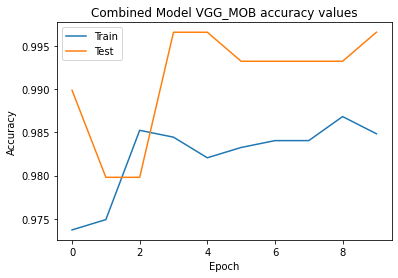

In [ ]:
# Plot training & validation loss values
plt.plot(ensemble_history3.history['accuracy'])
plt.plot(ensemble_history3.history['val_accuracy'])
plt.title('Combined Model VGG_MOB accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
ensemble_model4.compile(optimizer='adam',loss = 'categorical_crossentropy', metrics= ['accuracy'])
ensemble_history4 = ensemble_model4.fit(
    train_set,
    epochs=10,
    validation_data = val_set
)

ensemble_model4.save('/content/drive/MyDrive/Grocery/Models/ensemble_model_res_mob')

Epoch 1/10
53/53 [==============================] - 679s 13s/step - loss: 0.3867 - accuracy: 0.9648 - val_loss: 0.3814 - val_accuracy: 0.9595
Epoch 2/10
53/53 [==============================] - 640s 12s/step - loss: 0.3389 - accuracy: 0.9705 - val_loss: 0.3952 - val_accuracy: 0.9426
Epoch 3/10
53/53 [==============================] - 656s 12s/step - loss: 0.3243 - accuracy: 0.9727 - val_loss: 0.3577 - val_accuracy: 0.9561
Epoch 4/10
53/53 [==============================] - 656s 12s/step - loss: 0.3089 - accuracy: 0.9761 - val_loss: 0.3566 - val_accuracy: 0.9696
Epoch 5/10
53/53 [==============================] - 654s 12s/step - loss: 0.2876 - accuracy: 0.9788 - val_loss: 0.3322 - val_accuracy: 0.9696
Epoch 6/10
53/53 [==============================] - 654s 12s/step - loss: 0.2844 - accuracy: 0.9788 - val_loss: 0.3529 - val_accuracy: 0.9595
Epoch 7/10
53/53 [==============================] - 638s 12s/step - loss: 0.2863 - accuracy: 0.9777 - val_loss: 0.3366 - val_accuracy: 0.9595
Epoch 

In [ ]:
ensemble_model4.save('/content/drive/MyDrive/Colab Notebooks/thesis 400/GroceryStore_Validation/ensemble_model_res_mob')

In [ ]:
from keras.models import load_model
import math
steps_per_epoch_test = math.ceil(len(test_set)/ 10)

trained_model4 = load_model('/content/drive/MyDrive/Colab Notebooks/thesis 400/GroceryStore_Validation/ensemble_model_res_mob')
score_combined4= trained_model4.evaluate_generator(test_set, steps=steps_per_epoch_test)
print('Accuracy of Combined resNET50, MobileNET: {}% \n Error: {}'.format((score_combined4[1]*100), (1 - score_combined4[1])*100))

<ipython-input-31-64b9f1f0dfba>:6: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score_combined4= trained_model4.evaluate_generator(test_set, steps=steps_per_epoch_test)


Accuracy of Combined resNET50, MobileNET: 81.99999928474426% 
 Error: 18.000000715255737


# **Combination of Vgg-mob and res-mob**

In [ ]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average

combo_vgg_mob = load_model('/content/drive/MyDrive/Thesis_database/All_Models/ensemble_model_vgg_mob')
combo_vgg_mob = Model(inputs = combo_vgg_mob .inputs, outputs = combo_vgg_mob .outputs, name = 'modelvggmob')

combo_res_mob = load_model('/content/drive/MyDrive/Thesis_database/All_Models/ensemble_model_res_mob')
combo_res_mob = Model(inputs = combo_res_mob.inputs, outputs = combo_res_mob.outputs, name = 'modelresmob')

combine_models5 = [combo_vgg_mob, combo_res_mob]
model_input = Input(shape =(224, 224, 3))
model_outputs5 = [model(model_input) for model in combine_models5]
ensemble_output5 = Average ()(model_outputs5)
ensemble_model5= Model (inputs = model_input, outputs = ensemble_output5, name = 'ensemble5' )

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


train_path='/content/drive/MyDrive/Thesis_database/GroceryStoreDataset-master_withVal/dataset/train'
validation= '/content/drive/MyDrive/Thesis_database/GroceryStoreDataset-master_withVal/dataset/val'
train_set = train_datagen.flow_from_directory(train_path,
                                              target_size = (224, 224),
                                              batch_size = 50,
                                              class_mode = 'categorical')



val_set = train_datagen.flow_from_directory(validation,
                                            target_size = (224, 224),
                                            batch_size = 50,
                                            class_mode = 'categorical')


ensemble_model5.compile(optimizer='adam',loss = 'categorical_crossentropy', metrics= ['accuracy'])
ensemble_history5 = ensemble_model5.fit(
    train_set,
    epochs=10,
    validation_data = val_set
)

ensemble_model5.save('/content/drive/MyDrive/Thesis_database/All_Models/ensemble_vggmob_resmob')

Found 2640 images belonging to 3 classes.
Found 296 images belonging to 3 classes.
Epoch 1/10
53/53 [==============================] - 2280s 42s/step - loss: 0.6674 - accuracy: 0.7905 - val_loss: 0.5286 - val_accuracy: 0.7973
Epoch 2/10
53/53 [==============================] - 2171s 41s/step - loss: 0.4311 - accuracy: 0.8629 - val_loss: 0.3050 - val_accuracy: 0.8986
Epoch 3/10
53/53 [==============================] - 2164s 41s/step - loss: 0.2992 - accuracy: 0.8943 - val_loss: 0.3522 - val_accuracy: 0.8986
Epoch 4/10
53/53 [==============================] - 2159s 41s/step - loss: 0.2425 - accuracy: 0.9140 - val_loss: 0.3268 - val_accuracy: 0.8919
Epoch 5/10
53/53 [==============================] - 2174s 41s/step - loss: 0.2260 - accuracy: 0.9163 - val_loss: 0.2770 - val_accuracy: 0.9020
Epoch 6/10
53/53 [==============================] - 2168s 41s/step - loss: 0.2146 - accuracy: 0.9163 - val_loss: 0.2658 - val_accuracy: 0.9020
Epoch 7/10
53/53 [==============================] - 2215s 4

In [ ]:
ensemble_model5.save('/content/drive/MyDrive/Colab Notebooks/thesis 400/GroceryStore_Validation/ensemble_vggmob_resmob')

In [ ]:
from keras.models import load_model
import math
steps_per_epoch_test = math.ceil(len(test_set)/ 10)

trained_model5 = load_model('/content/drive/MyDrive/Colab Notebooks/thesis 400/GroceryStore_Validation/ensemble_vggmob_resmob')
score_combined5 = trained_model5.evaluate_generator(test_set, steps=steps_per_epoch_test)
print('Accuracy of Combined Vgg-ResNET and ResNET-MobileNET: {}% \n Error: {}'.format((score_combined5[1]*100), (1 - score_combined5[1])*100))

In [ ]:
autotune = tf.data.AUTOTUNE
train_ds = train_set.cache().shuffle(1000).prefetch(buffer_size = autotune)
val_ds = val_set.cache().prefetch(buffer_size = autotune)